# Proyecto : 

# PCA y Clustering utilizando Python #

In [1]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Desactivamos las advertencias que puedan aparecer.
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")

# show plots inline
%matplotlib inline

### 1. Recolección de datos ###

In [2]:
# Obtenemos los datos y observamos algunos registros

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])


#data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

,sepal length,sepal width,petal length,petal width,target
34,4.9,3.1,1.5,0.1,Iris-setosa
149,5.9,3.0,5.1,1.8,Iris-virginica
97,6.2,2.9,4.3,1.3,Iris-versicolor
105,7.6,3.0,6.6,2.1,Iris-virginica
116,6.5,3.0,5.5,1.8,Iris-virginica


In [3]:
# Establecemos las variables predictoras (X) y la variable a predecir (y)
X = data.iloc[:,0:4]
y = data.iloc[:,-1]

print("\n Caracteristicas \n")
print(X.sample(5))
print("\n Target \n")
print(y.sample(5))


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
3             4.6          3.1           1.5          0.2
107           7.3          2.9           6.3          1.8
66            5.6          3.0           4.5          1.5
124           6.7          3.3           5.7          2.1
105           7.6          3.0           6.6          2.1

 Target 

87     Iris-versicolor
121     Iris-virginica
102     Iris-virginica
33         Iris-setosa
21         Iris-setosa
Name: target, dtype: object


### 2. Visualización de los datos ###

In [4]:
data["target"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64

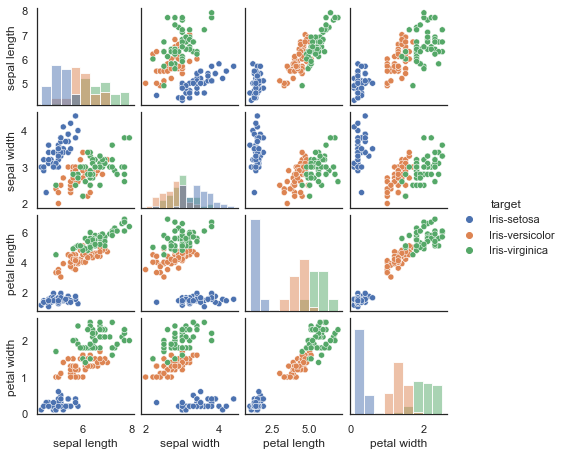

In [5]:
# Utilizamos pairplot para observar las relaciones entre las diversas variables y el target

sns.pairplot(data, hue="target", diag_kind="hist", size=1.6);

Versicolor y Virginica son muy similares, sera muy dificil generar un algoritmo de clustering que las pueda separar, pero vamos a intentarlo!! 

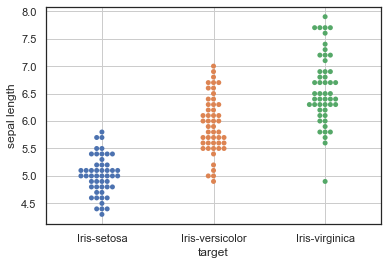

In [6]:
# Grafica similar al boxplot que nos permite ver la distribución de nuestras variables por cada tipo 
# del target. Nos permite observar también la presencia o no de valores atípicos
sns.swarmplot(x="target", y="sepal length", data=data)
plt.grid()

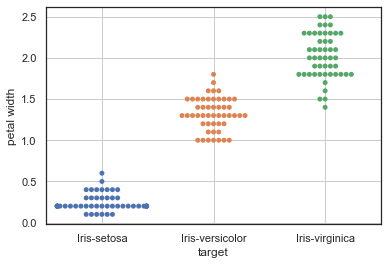

In [7]:
sns.swarmplot(x="target", y="petal width", data=data)
plt.grid()

### *Punto 1: Aplica un escalado en el dataset para que todas las características pasen a estar en la misma escala y el algoritmo no priorice las variables con mayor varianza.* ###

**Escalado de valores del dataset**

Los datos estan desbalanceados por ejemplo Sepal Lenght es aproximadamente 4 veces mas grande que Petal Width, 
por lo tando recomiendo escalar los valores.
de lo contrario, las características más grandes dominarán a las demás en la agrupación, etc.

In [8]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()


# GENERAR UN VECTOR CON LOS VALORES DE X ESCALADOS LLAMADO X_scaled_array
# EN EL OUTPUT PUEDEN VER COMO DEBERIA QUEDAR EL DATAFRAME


scaler.fit(X)
   
X_scaled_array =  scaler.transform(X)

X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)

X_scaled.sample(10)

,sepal length,sepal width,petal length,petal width
121,-0.294842,-0.587764,0.649027,1.053537
21,-0.900681,1.494863,-1.284407,-1.050031
43,-1.021849,1.032057,-1.227541,-0.787085
7,-1.021849,0.800654,-1.284407,-1.312977
0,-0.900681,1.032057,-1.341272,-1.312977
143,1.159173,0.337848,1.217684,1.447956
35,-1.021849,0.337848,-1.455004,-1.312977
145,1.038005,-0.124958,0.819624,1.447956
75,0.916837,-0.124958,0.364699,0.264699
52,1.280340,0.106445,0.649027,0.396172


### Método del codo & Método de la Silueta para determinar número de clusters ###

Es lo que utilizaremos para determinar el número de clusters a utilizar. Un valor cercano a +1 indica que la muestra está lejos de los conglomerados vecinos. Un valor de 0 indica que la muestra se encuentra en el límite de decisión entre dos conglomerados vecinos o muy cerca del mismo, y los valores negativos indican que es posible que esas muestras se hayan asignado al conglomerado equivocado.

In [9]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


### *Punto 2: Aplica el algoritmo K-MEANS con un K=3 determinando por los pasos previos de método de la silueta y elbow, que ya están desarrollados.* ###

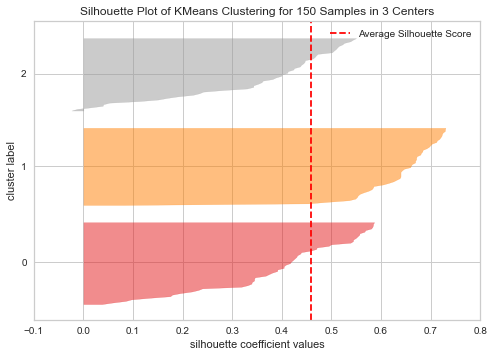

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [10]:
# Preparación del modelo KMeans con K=3 y visualización del método de la silueta


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 3
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    
visualizer.show()    


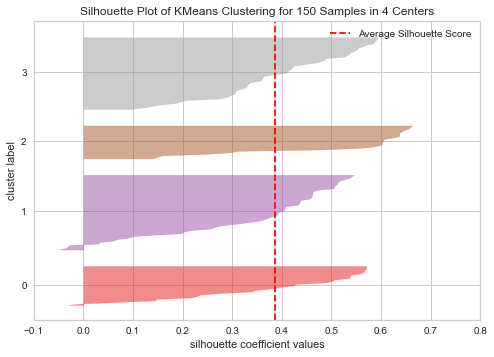

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 150 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [11]:
# Preparación del modelo KMeans con K=4 y visualización del método de la silueta


from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

nclusters = 4
seed = 0

model = KMeans(n_clusters=nclusters
            , init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = SilhouetteVisualizer(model)

visualizer.fit(X_scaled)    
visualizer.show()    


### **Conclusión :** ###

**Se puede observar que con 3 cluster se obtiene un promedio de score de silueta de 0,47 y con 4 clusters un score de 0,39 aproximadamente, por lo tanto se recomienda entrenar un modelo de clustering con 3 clusters.**

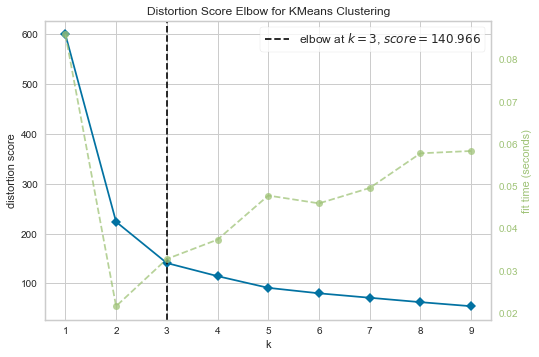

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [12]:
# Utilizamos ahora el método del codo

from yellowbrick.cluster import KElbowVisualizer

seed = 0

km = KMeans(init = 'k-means++'
            , max_iter=500
            , n_init=10
            , random_state=seed)


visualizer = KElbowVisualizer(km, k=(1,10))
 
visualizer.fit(X_scaled)        
visualizer.show()               

### **Conclusión :** ###

**Observamos por el metodo de ELBOW que tenemos que utilizar un K=3 es decir 3 clusters, lo que coincide con el método de silueta evaluado anteriormente.**

### K-Means

Intente agrupar los datos en 4D y ver si puede reproducir los clústeres reales. Es decir, imagine que no tenemos las etiquetas de especies en estos datos y queremos dividir las flores en especies. podría establecer un número arbitrario de grupos 
e intentar dividirlos en grupos similares. Sabemos que hay 3 especies, así que encontremos 3 especies y veamos 
si las predicciones para cada punto coinciden con la etiqueta en y, por otro lado sabemos que por el metodo de las siluetas y elbow, la cantidad de clusters recomendada es 3

In [13]:
from sklearn.cluster import KMeans

nclusters = 3 
seed = 0
 
#Complete aqui, llamando al metodo de K-means para entrenar el modelo utilizando las variables ncluster y seed
#Utilice X_Scaled para entrenar el modelo
#
#
km = KMeans(n_clusters=3, random_state=0)
km.fit(X_scaled)
#
#
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)

print("\n Caracteristicas \n")
print(X_scaled)

print("\n\n\n Clusters \n")
print(y_cluster_kmeans)


 Caracteristicas 

     sepal length  sepal width  petal length  petal width
0       -0.900681     1.032057     -1.341272    -1.312977
1       -1.143017    -0.124958     -1.341272    -1.312977
2       -1.385353     0.337848     -1.398138    -1.312977
3       -1.506521     0.106445     -1.284407    -1.312977
4       -1.021849     1.263460     -1.341272    -1.312977
..            ...          ...           ...          ...
145      1.038005    -0.124958      0.819624     1.447956
146      0.553333    -1.281972      0.705893     0.922064
147      0.795669    -0.124958      0.819624     1.053537
148      0.432165     0.800654      0.933356     1.447956
149      0.068662    -0.124958      0.762759     0.790591

[150 rows x 4 columns]



 Clusters 

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0
 0 2 2 2 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2

### *Punto 3: Aplica el algoritmo de PCA para transformar las 4 columnas de características a un nuevo dataset de 2 características principales, para que en los siguientes pasos se puedan observar los clusters en un gráfico de 2 dimensiones.* ###


### Principal Component Analysis (PCA)


Si tiene muchas característics, puede ser útil reducir algunas características, para evitar la maldición de la dimensionalidad (es decir, necesitar exponencialmente más datos para hacer predicciones precisas a medida que crece la cantidad de características). 
Puede hacer esto con el análisis de componentes principales (PCA), que reasigna los datos a un nuevo sistema de coordenadas (más pequeño) que trata de dar cuenta de la mayor información posible. puedes *también* usar PCA para visualizar los datos al reducir las características a 2 dimensiones y hacer un diagrama de dispersión.

En este caso recomiendo usar PCA para poder visualizar los datos, ya entrenamos el modelo de K-means y tenemos los clusters identificados, ahora transformemos de 4D a 2D las caracteristicas. para solo visualizarlas en un grafico, y poder observar los CLUSTERS.

In [14]:
from sklearn.decomposition import PCA

ndimensions = 2


# Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, 
# puede utilizar la variable ndimension

pca = PCA(n_components=ndimensions)
X_pca_array = pca.fit_transform(X) 

# Aplique un algoritmo de PCA en X_scaled, para pasar de 4 a 2 dimensiones, 
# puede utilizar la variable ndimension

X_pca = pd.DataFrame(X_pca_array, columns=['principal component 1','principal component 2']) 


print(X_pca.sample(10))
explained_variance = pca.explained_variance_ratio_
print("\n\n explained_variance")
print(explained_variance)

     principal component 1  principal component 2
72                1.296469              -0.327562
21               -2.543235               0.440032
135               3.076522               0.685764
86                1.220429               0.408035
9                -2.673845              -0.106692
82                0.134995              -0.311710
112               2.165379               0.215280
12               -2.787434              -0.227740
121               1.198097              -0.605579
70                1.116241              -0.084214


 explained_variance
[0.92461621 0.05301557]


Tenemos nuevas coordenadas 2D para cada punto de datos. 
En este punto, si no tiene datos etiquetados, puede agregar los ID de clúster de k-means a esta tabla y hacer un 
diagrama de dispersión de colores. en realidad tenemos etiquetas para los puntos de datos, pero imaginemos que 
no las tenemos, y usemos las etiquetas pronosticadas para ver cómo se ven las predicciones. 



In [15]:
finalDf = pd.concat([X_pca, data[['target']]], axis = 1)
finalDf.head()

finalDf['ClusterKmeans'] = y_cluster_kmeans
finalDf.sample(10)

,principal component 1,principal component 2,target,ClusterKmeans
62,0.262336,-0.547893,Iris-versicolor,0
69,0.043246,-0.581489,Iris-versicolor,0
56,1.095224,0.283891,Iris-versicolor,2
23,-2.303129,0.105523,Iris-setosa,1
136,2.144987,0.138907,Iris-virginica,2
121,1.198097,-0.605579,Iris-virginica,0
88,0.245195,-0.266728,Iris-versicolor,0
128,2.122854,-0.210855,Iris-virginica,2
99,0.297808,-0.347017,Iris-versicolor,0
144,2.419391,0.303504,Iris-virginica,2


### Grafica de Dispersion (TARGET)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados a la etiqueta o target, ya que partimos de un dataset etiquetado.

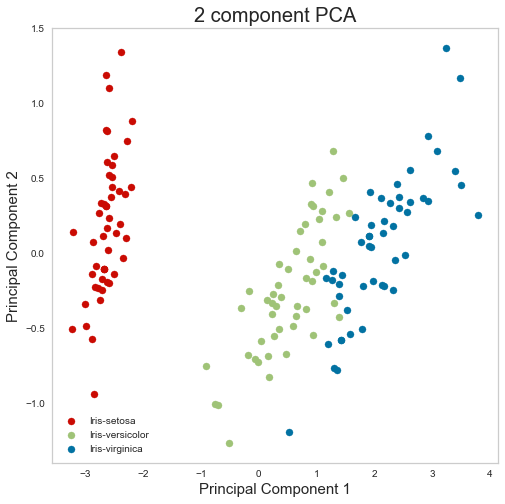

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

### Grafica de Dispersion (CLUSTERS)

En esta grafica visualizaremos todos los puntos, en donde los ejes son los componentes principales obtenidos de aplicar PCA al dataset escalado, y cada punto se visualizara pintado con colores asociados al CLUSTER obtenido luego de aplicar K-MEANS, como se puede comparar con los datos etiquetados, los clusters se ASEMEJAN BASTANTE.

Un mecanismo asi puede ser utilizado para etiquetar flores, cuando no tenemos la etiqueta de antemano, incluso nos puede servir para generar clasificaciones mas especificas.

Como aclaramos desde el principio, la division entre Versicolor y Virginica es muy fina, y en ambos graficos es costoso encontrar una division clara.

La division real, basada en los datos etiquetados de antemano, es por una linea VERTICAL al medio del conjunto de datos, en cambio segun K-means, la division es por una linea horizontal a traves de los datos.

En estos casos la realidad difiere un poco, de lo que establece un algoritmo matematico. Seguramente para obtener una mejor division sea necesario contar con mas caracteristicas.

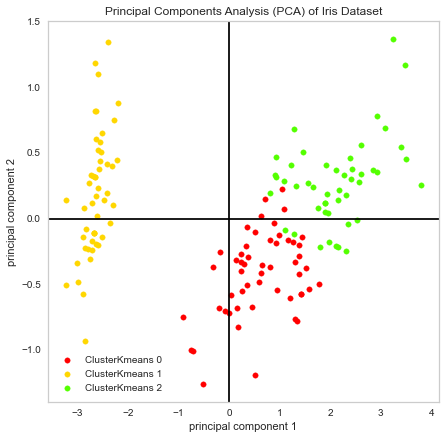

In [17]:
# Gráfico 2D scaterplot para visualizar los clusters

def plotData(df, groupby):
    "make a scatterplot of the first two principal components of the data, colored by the groupby field"
    
    # make a figure with just one subplot.
    # you can specify multiple subplots in a figure, 
    # in which case ax would be an array of axes,
    # but in this case it'll just be a single axis object.
    fig, ax = plt.subplots(figsize = (7,7))

    # color map
    cmap = mpl.cm.get_cmap('prism')

    # we can use pandas to plot each cluster on the same graph.
    for i, cluster in df.groupby(groupby):
        cluster.plot(ax = ax, # need to pass this so all scatterplots are on same graph
                     kind = 'scatter', 
                     x = 'principal component 1', y = 'principal component 2',
                     color = cmap(i/(nclusters-1)), # cmap maps a number to a color
                     label = "%s %i" % (groupby, i), 
                     s=30) # dot size
    ax.grid()
    ax.axhline(0, color='black')
    ax.axvline(0, color='black')
    ax.set_title("Principal Components Analysis (PCA) of Iris Dataset");
    
# plot the clusters each datapoint was assigned to
plotData(finalDf, 'ClusterKmeans')
    

## Introduzca una conclusión de los resultados obtenidos

### CONCLUSION DEL ANALISIS DESARROLLADO: ###

Como primer punto, la estandarización es útil e incluso necesaria ya que los datos tienen valores de entrada con diferentes escalas. Los datos en este caso están desbalanceados, en este caso *sepal lenght* es aproximadamente 4 veces mas grande que *petal width*. 
En cuanto a los métodos para determinar el número de clusters a utilizar, en mi opinión no deberíamos quedarnos solamente con uno de los dos métodos. Creo que para tener una aproximación, el método del codo parece mas simple de aplicar como primera observación. Una vez que tenemos una idea general del número de clusters a utilizar, usando el método de la silueta (cmomputacionalmente más complejo), definimos el número ideal de K a utilizar. 
En cuanto al uso de PCA para este dataset, ayuda sobre todo al entendimiento y la aplicación de este algoritmo. Puede no ser de utilidad en un dataset con 4 variables como este, pero si su uso fue de mucha importancia en este proyecto para comprender su utilidad. 
A través de este algoritmo, podemos si definir con claridad nuestros tres clusters (tres tipos de flor) y separarlos casi linearmente. *Iris versicolo* e *Iris virginica* son muy parecidas entre si, lo que en otras circunstancias o en otro dataset, nos puede costar mucho encontrar una diferencia en ese cluster donde los datos son tan similares entre dos categoías distintas. Si podemos separar a *Iris setosa* de los otros dos tipos de especies. Probablemnte en dataset de más características, esta división sería más sencilla de realizar para el algoritmo. 
Como conclusión final, creo que el data set y la aplicación de este K-means en este proyecto, me fue de mucha utilidad para entender como trabajan los distintos algoritmos y los métodos de codo y silueta, y su funcionamiento me será de utilidad como base para aplicarlo en otros dataset de mayor complejidad. 








### *Punto adicional: Si es posible, aplica otros algoritmos diferentes a K-means. Para agrupar los elementos puedes aplicar agrupamiento jerárquico, dbscan, o el algoritmo que desees probar, el objetivo es evaluar qué resultados se obtienen con distintos algoritmos.* ###

In [18]:
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [19]:
iris = datasets.load_iris()
X = iris.data
data = pd.DataFrame(X)

In [20]:
std_slc = StandardScaler()
X_std = std_slc.fit_transform(X)

In [21]:
clt = DBSCAN(eps=0.5, metric='euclidean', min_samples=5)

model = clt.fit(X_std)

clusters = pd.DataFrame(model.fit_predict(X_std))
data["Cluster"] = clusters

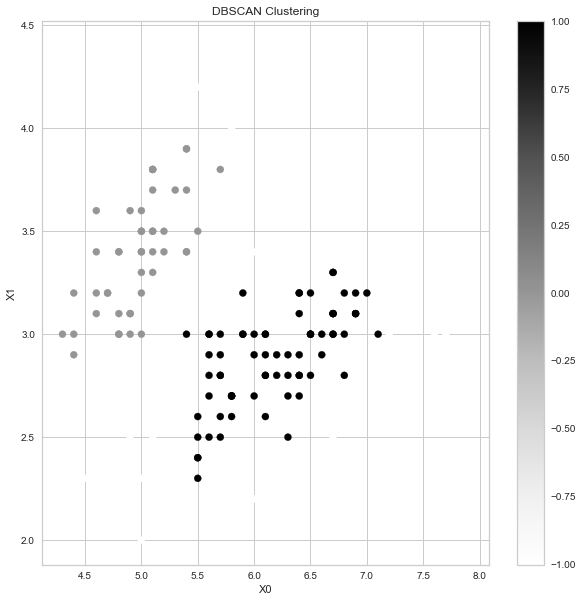

In [22]:
fig = plt.figure(figsize=(10,10)); ax = fig.add_subplot(111)
scatter = ax.scatter(data[0],data[1], c=data["Cluster"],s=50)
ax.set_title("DBSCAN Clustering")
ax.set_xlabel("X0")
ax.set_ylabel("X1")
plt.colorbar(scatter)
plt.show()

En este caso, aplicando DBSCAN para el dataset de Iris, en este caso realiza una separación en 2 clusters, y no puede realizar la diferencia entre versicolor y virginica, algo que si podíamos realizar en los algoritmos anteriores.